# Описание проекта

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

## Описание данных

Каждая запись в логе — это действие пользователя, или событие. 
* EventName — название события;
* DeviceIDHash — уникальный идентификатор пользователя;
* EventTimestamp — время события;
* ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

Инструкция по выполнению проекта
* Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/logs_exp.csv. 

* Шаг 2. Подготовьте данные
Замените названия столбцов на удобные для вас;
Проверьте пропуски и типы данных. Откорректируйте, если нужно;
Добавьте столбец даты и времени, а также отдельный столбец дат;

* Шаг 3. Изучите и проверьте данные
Сколько всего событий в логе?
Сколько всего пользователей в логе?
Сколько в среднем событий приходится на пользователя?
Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
Много ли событий и пользователей вы потеряли, отбросив старые данные?
Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

* Шаг 4. Изучите воронку событий
Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
На каком шаге теряете больше всего пользователей?
Какая доля пользователей доходит от первого события до оплаты?

* Шаг 5. Изучите результаты эксперимента
Сколько пользователей в каждой экспериментальной группе?
Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

## Шаг 1

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
from scipy import stats as st
import seaborn as sns
import math as mth

In [2]:
data = pd.read_csvd# загружаем файл
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [3]:
data['EventName'].value_counts() # всего 5 событий

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: EventName, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
data.describe()

,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


Пропусков нет,выбросов не видно.

## Шаг 2

* Подготовьте данные 
* Замените названия столбцов на удобные для вас; 
* Проверьте пропуски и типы данных. Откорректируйте, если нужно; 
* Добавьте столбец даты и времени, а также отдельный столбец дат;

In [6]:
# Переименуем столбцы:
data = data.rename(columns={"EventName": "event", "DeviceIDHash": "user_id", 
                            "EventTimestamp": "time", "ExpId": "group"})
data.head()

,event,user_id,time,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [7]:
data.duplicated().sum()# смотрим количество дублей


413

In [8]:
data[data.duplicated()].sort_values(by=['event','user_id','time','group']) # смотрим значения дублей,
# судя по полному совпадению значений неверное копирование- удалим

,event,user_id,time,group
104108,CartScreenAppear,34565258828294726,1564857221,248
17037,CartScreenAppear,197027893265565660,1564659614,246
23421,CartScreenAppear,197027893265565660,1564668928,246
34223,CartScreenAppear,197027893265565660,1564684544,246
112562,CartScreenAppear,197027893265565660,1564902904,246
...,...,...,...,...
154606,Tutorial,5767286434014984014,1565004351,246
154607,Tutorial,5767286434014984014,1565004351,246
154609,Tutorial,5767286434014984014,1565004352,246
154610,Tutorial,5767286434014984014,1565004352,246


In [9]:
data = data.drop_duplicates() # удаляем дубликаты
data = data.reset_index(drop=True) 

In [10]:
data.duplicated().sum() # проверяем

0

In [11]:
data['datetime'] = pd.to_datetime(data['time'], unit='s') # добавляем столбец с датой и временем
data['date'] = data['datetime'].dt.date # добавляем столбец с датой

In [12]:
data.info() # проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   event     243713 non-null  object        
 1   user_id   243713 non-null  int64         
 2   time      243713 non-null  int64         
 3   group     243713 non-null  int64         
 4   datetime  243713 non-null  datetime64[ns]
 5   date      243713 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


In [13]:
data['date'] = data['date'].astype('datetime64') # меняем тип данных date

In [14]:
data.head(5)

,event,user_id,time,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [15]:
users_all_group = data.groupby('user_id').agg( # проверяем есть ли одинаковые пользователи в разных группах
    {'group': 'nunique'}).query('group > 1').reset_index()
users_all_group

,user_id,group


Результат:
* Пропусков нет
* Дубли удалили
* Нужные столбцы добавили
* Поменяли тип данных для дальнейшей работы
* Проверили наличие одних юзеров в разных группах,таких нет

## Шаг 3

Изучите и проверьте данные 
* Сколько всего событий в логе? 
* Сколько всего пользователей в логе? 
* Сколько в среднем событий приходится на пользователя? 
* Данными за какой период вы располагаете? 
* Найдите максимальную и минимальную дату. 
* Постройте гистограмму по дате и времени.  
* Определите, с какого момента данные полные и отбросьте более старые. 
* Данными за какой период времени вы располагаете на самом деле? 
* Много ли событий и пользователей вы потеряли, отбросив старые данные? 
* Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

### Сколько всего событий в логе?
### Сколько всего пользователей в логе?
### Сколько в среднем событий приходится на пользователя?

In [16]:
events = len(data['event']) # всего событий
users = data['user_id'].nunique() # всего уникальных пользователей


print('Всего событий: ',len(data['event']))
print('Всего пользователей: ',data['user_id'].nunique())
print("Среднее количество событий на пользователя: ", (events / users))

Всего событий:  243713
Всего пользователей:  7551
Среднее количество событий на пользователя:  32.27559263673685


### Данными за какой период вы располагаете?
### Найдите максимальную и минимальную дату.
### Постройте гистограмму по дате и времени.
### Можно ли быть уверенным, что у вас одинаково полные данные за весь период?

### Определите, с какого момента данные полные и отбросьте более старые.
### Данными за какой период времени вы располагаете на самом деле?

In [17]:
data['date'].describe() # смотрим даты, минимальную и максимальную даты

/tmp/ipykernel_703/1795728277.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['date'].describe() # смотрим даты, минимальную и максимальную даты


count                  243713
unique                     14
top       2019-08-01 00:00:00
freq                    36141
first     2019-07-25 00:00:00
last      2019-08-07 00:00:00
Name: date, dtype: object

Минимальная дата логов 25.07.2019,максимальная 07.08.2019

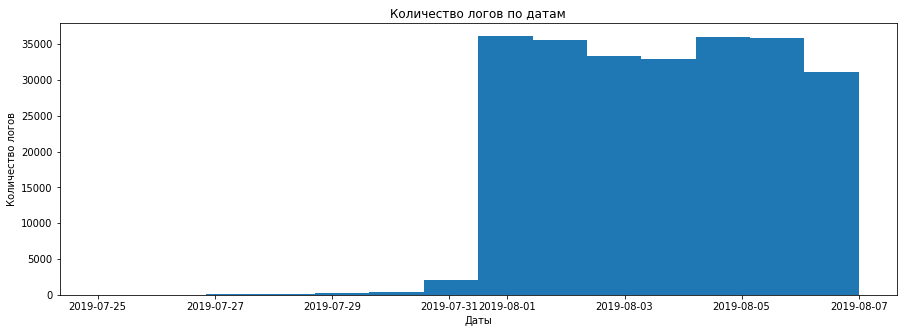

In [18]:
plt.figure(figsize=(15,5))
plt.hist(data['date'], bins=14) 
plt.xlabel('Даты')
plt.ylabel('Количество логов')
plt.title('Количество логов по датам'); # строим гистограмму по датам

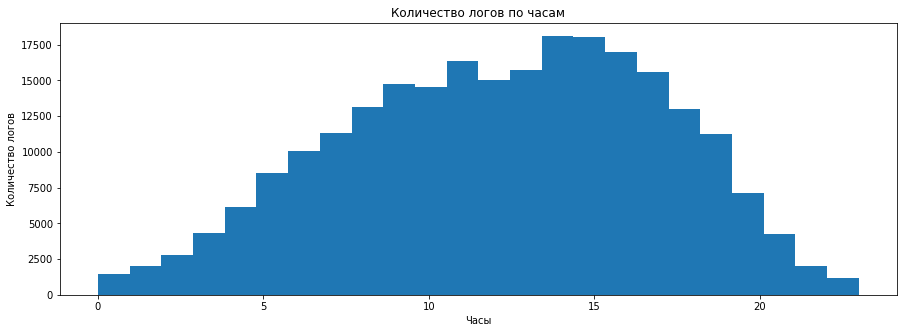

In [19]:
plt.figure(figsize=(15,5))
plt.hist(data['datetime'].dt.hour, bins=24) 
plt.xlabel('Часы')
plt.ylabel('Количество логов')
plt.title('Количество логов по часам');

По датам видим очень маленькое количество логов за июль.
По времени видим,что основное количество действия пользователи проводят в рабочее время.

In [20]:
data = data[data['date'] >= '2019-08-01'].reset_index(drop=True)# перезаписываем переменную с обновленными датами
data['date'].value_counts() # проверяем

2019-08-01    36141
2019-08-05    36058
2019-08-06    35788
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-07    31096
Name: date, dtype: int64

Полные данные у нас с 01.08.2019 по 07.08.2019,июльские даты мы отбросили.

In [21]:
new_users = data['user_id'].nunique()
print('Отфильтрованные пользователи: ',users-new_users)
print('Доля отфильтрованных пользователей:',(users-new_users) / users* 100)

new_events = data['event'].count()
print('Отфильтрованные события: ',events-new_events)
print('Доля отфильтрованных пользователей:',(events-new_events) / events* 100)

Отфильтрованные пользователи:  17
Доля отфильтрованных пользователей: 0.22513574361011784
Отфильтрованные события:  2826
Доля отфильтрованных пользователей: 1.159560630741897


Количество логов в июле несущественно,чуть более 1 % от общего количества,а пользователей 0.2 %.Можно отбросить.

### Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [22]:
data['group'].value_counts()

248    84563
246    79302
247    77022
Name: group, dtype: int64

Все группы на месте.
Группы почти идеинтичны по количеству.

## Шаг 4

* Изучите воронку событий Посмотрите, какие события есть в логах, как часто они встречаются. 
Отсортируйте события по частоте. 
* Посчитайте, сколько пользователей совершали каждое из этих событий. 
 Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие. 
* Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки. 
* По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B. 
* На каком шаге теряете больше всего пользователей? Какая доля пользователей доходит от первого события до оплаты?

### Изучите воронку событий Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [23]:
data['event'].value_counts() # смотрим какие события есть в логах

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

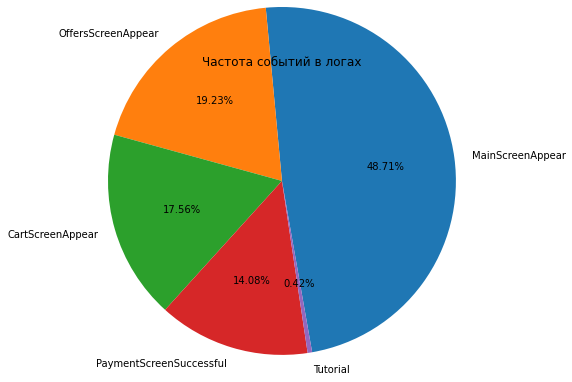

In [24]:
fig, ax = plt.subplots()# построим визуализацию
x = [117328,46333,42303,33918,1005]
ax.pie(x,labels = data['event'].value_counts().index,autopct='%.2f%%',startangle=280,radius=2)
ax.set_title('Частота событий в логах') 
plt.show();

* MainScreenAppear (Главный экран) посмотрели 117328 раз ( 48 % из общего числа событий)
* OffersScreenAppear (Продающий экран) посмотрели 46333 раз (19%)
* CartScreenAppear (Корзина) посмотрели 42303 раз (17%)
* PaymentScreenSuccessful (Завершение оплаты) увидели 33918 раз (14%)
* Tutorial (Урок) просмотрели 1005 раз (менее 1 %)

### Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

In [25]:
ev_users = data.groupby('event').agg({'event':'count', 'user_id':'nunique'}).sort_values(by='user_id', ascending=False)
ev_users.columns = ['cnt_events', 'users']
ev_users = ev_users.reset_index()
ev_users['users_one_time'] = (ev_users['users'] / new_users * 100) # добавим к нашей таблице столбец с долей пользователей,
# которые совершили хотя бы одно событие
ev_users

,event,cnt_events,users,users_one_time
0,MainScreenAppear,117328,7419,98.473586
1,OffersScreenAppear,46333,4593,60.963632
2,CartScreenAppear,42303,3734,49.561986
3,PaymentScreenSuccessful,33918,3539,46.973719
4,Tutorial,1005,840,11.149456


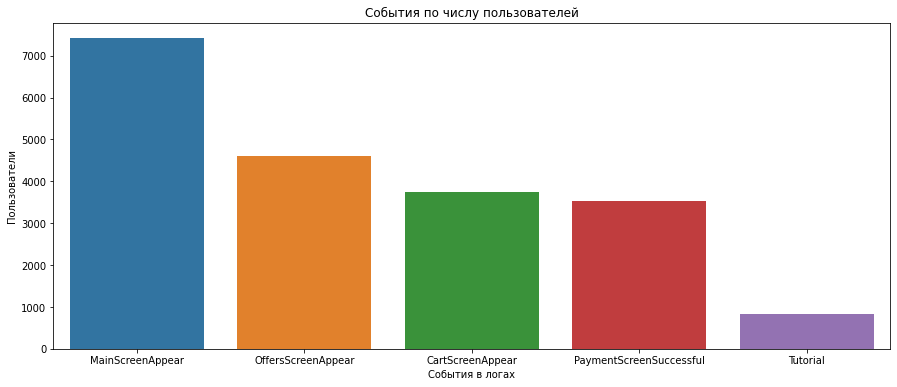

In [26]:
plt.figure(figsize=(15,6)) # визуализируем События по числу пользователей
sns.barplot(y='users', x='event', data=ev_users);
plt.xlabel('События в логах')
plt.ylabel('Пользователи')
plt.title('События по числу пользователей')
plt.show();

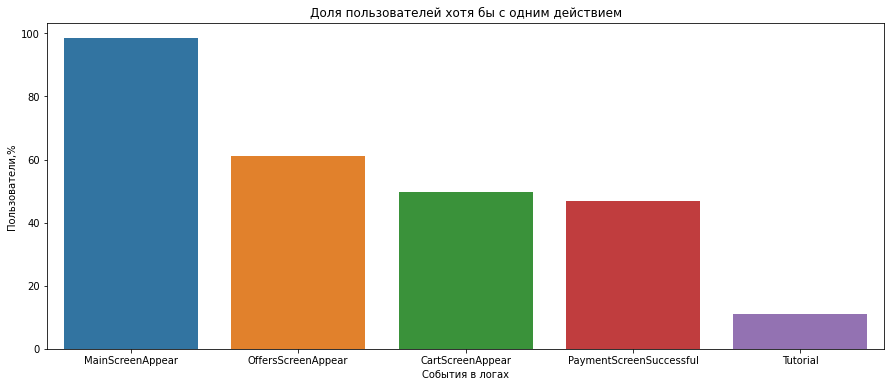

In [27]:
plt.figure(figsize=(15,6)) # визуализируем по Доле пользователей хотя бы с одним действием
sns.barplot(y='users_one_time', x='event', data=ev_users);
plt.xlabel('События в логах')
plt.ylabel('Пользователи,%')
plt.title('Доля пользователей хотя бы с одним действием')
plt.show();

* MainScreenAppear (Главный экран) посмотрели 7419 пользователей ( 98 % из общего числа пользователей хотя бы раз)
* OffersScreenAppear (Продающий экран) посмотрели 4593 пользователей ( 60 % из общего числа пользователей хотя бы раз)
* CartScreenAppear (Корзина) посмотрели 3734 пользователей ( 49 % из общего числа пользователей хотя бы раз)
* PaymentScreenSuccessful (Завершение оплаты) посмотрели 3539 пользователей ( 46 % из общего числа пользователей хотя бы раз)
* Tutorial (Урок) посмотрели 840 пользователей ( 11 % из общего числа пользователей хотя бы раз)


### Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

На графиках выше видно,что количество пользователей доходя до следующего этапа падает,что логично.

Порядок следующий:
MainScreenAppear (Главный экран)---OffersScreenAppear (Продающий экран)---CartScreenAppear (Корзина)---PaymentScreenSuccessful (Завершение оплаты)

Tutorial (Урок) не совсем входит в обязательную цепочку событий пользователя,возможно также может быть просмотрен в любой момент,что мешает логике прохождения последовательного прохождения по этапам.
Считаю,что данное событие возможно исключить.

### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

In [28]:
ev_users = ev_users[ev_users['event'] != 'Tutorial'] # уберем из нашей таблицы события Tutorial
ev_users['values_previous %'] = round(ev_users['users'] / 
                                     ev_users['users']
                                     .shift(periods=1, fill_value=ev_users['users'][0]) * 100,1)
                                     

ev_users

/tmp/ipykernel_703/789448692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_users['values_previous %'] = round(ev_users['users'] /


,event,cnt_events,users,users_one_time,values_previous %
0,MainScreenAppear,117328,7419,98.473586,100.0
1,OffersScreenAppear,46333,4593,60.963632,61.9
2,CartScreenAppear,42303,3734,49.561986,81.3
3,PaymentScreenSuccessful,33918,3539,46.973719,94.8


* 62 % пользователей переходят с этапа MainScreenAppear (Главный экран) на OffersScreenAppear (Продающий экран)
* 81 % пользователей переходят с этапа OffersScreenAppear (Продающий экран) на CartScreenAppear (Корзина) 
* 95 % пользователей переходят с этапа CartScreenAppear (Корзина) на PaymentScreenSuccessful (Завершение оплаты)

### На каком шаге теряете больше всего пользователей? Какая доля пользователей доходит от первого события до оплаты?


По таблице выше видим,что наибольшее число пользвателей теряется на переходе от MainScreenAppear (Главный экран) на OffersScreenAppear (Продающий экран).


In [29]:
ev_users['values_all_steps %'] = round(ev_users['users'] / ev_users['users'].iloc[0] * 100,1)
# ev_users = ev_users.reset_index()
ev_users


/tmp/ipykernel_703/1550062662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_users['values_all_steps %'] = round(ev_users['users'] / ev_users['users'].iloc[0] * 100,1)


,event,cnt_events,users,users_one_time,values_previous %,values_all_steps %
0,MainScreenAppear,117328,7419,98.473586,100.0,100.0
1,OffersScreenAppear,46333,4593,60.963632,61.9,61.9
2,CartScreenAppear,42303,3734,49.561986,81.3,50.3
3,PaymentScreenSuccessful,33918,3539,46.973719,94.8,47.7


Видим,что 47 % пользователей доходят до оплаты с первого этапа.Что неплохо.

## Шаг 5

Изучите результаты эксперимента: 

* Сколько пользователей в каждой экспериментальной группе? 
Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов.

* Проверьте, находят ли статистические критерии разницу между выборками 246 и 247. Выберите самое популярное событие. 

* Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. 

* Посчитайте долю пользователей, совершивших это событие. 

* Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). 

* Можно ли сказать, что разбиение на группы работает корректно? Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. 

* Сравните результаты с объединённой контрольной группой. 

* Какие выводы из эксперимента можно сделать? Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

### Сколько пользователей в каждой экспериментальной группе? Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов.

* Проверьте, находят ли статистические критерии разницу между выборками 246 и 247. Выберите самое популярное событие.

* Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп.

* Посчитайте долю пользователей, совершивших это событие.

* Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию).

* Можно ли сказать, что разбиение на группы работает корректно? Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию.

* Сравните результаты с объединённой контрольной группой.

In [30]:
data.head()

,event,user_id,time,group,datetime,date
0,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
1,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
3,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
4,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01


In [31]:
gr_users = data.groupby('group')['user_id'].nunique() # смотрим сколько уникальных пользователей в каждой группе
gr_users

group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

In [32]:
group_test = data[data['event']!='Tutorial'].pivot_table( # составим таблицу по группам для анализа теста
    index='event', 
    columns='group',
    values='user_id',
    aggfunc='nunique').sort_values(by=246, ascending=False)
group_test = group_test.reset_index()
group_test

group,event,246,247,248
0,MainScreenAppear,2450,2476,2493
1,OffersScreenAppear,1542,1520,1531
2,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181


In [33]:
group_test['AA'] = group_test[246] + group_test[247] # рассчитаем доли по группам по каждому событию
group_test['all'] = group_test['AA'] + group_test[248] # все пользователи совершившие событие

group_test['share_246'] = (group_test[246] / gr_users[246] * 100).round(1)
group_test['share_247'] = (group_test[247] / gr_users[247] * 100).round(1)
group_test['share_248'] = (group_test[248] / gr_users[248] * 100).round(1)
group_test['share_246_247'] = ((group_test[246] + group_test[247]) / \
                                  (gr_users[246] + gr_users[247]) * 100).round(1)
group_test

group,event,246,247,248,AA,all,share_246,share_247,share_248,share_246_247
0,MainScreenAppear,2450,2476,2493,4926,7419,98.6,98.5,98.3,98.6
1,OffersScreenAppear,1542,1520,1531,3062,4593,62.1,60.5,60.3,61.3
2,CartScreenAppear,1266,1238,1230,2504,3734,51.0,49.3,48.5,50.1
3,PaymentScreenSuccessful,1200,1158,1181,2358,3539,48.3,46.1,46.6,47.2


* Как видим из таблицы выше- самое популярное событие MainScreenAppear (Главный экран).
246-2450(98.6%) пользователей,247-2476(98.5%) пользователей,248-2493(98.3%) пользователя.

* Разбиение на группы работает корректно,доли пользователей совершивших то или иное событие почти не различаются по группам
 

### Какие выводы из эксперимента можно сделать? Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

In [34]:
# возьмем функцию из курса  
# подготовим ее для  проверки гипотезы на равенство долей
def z_test(test_group1, test_group2, alpha_value, n):
    for i in group_test.index:
        alpha = alpha_value / n # поправка бонферрони
        # пропорция успехов в первой группе
        p1 = group_test[test_group1][i] / gr_users[test_group1]
        # пропорция успехов во второй группе:
        p2 = group_test[test_group2][i] / gr_users[test_group2]
        # пропорция успехов в комбинированном датасете:
        p_combined = ((group_test[test_group1][i] + group_test[test_group2][i]) / 
                      (gr_users[test_group1] + gr_users[test_group2]))
        # разница пропорций в датасетах
        difference = p1 - p2
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/gr_users[test_group1] + 1/gr_users[test_group2]))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(group_test['event'][i], p_value))
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print('')


### Test 246-247

Выдвинем гипотезы:
* H0: различий в ĸонверсии в покупку между группами 246 и 247 нет,
* H1: между группами 246 и 247 есть значимая разница в ĸонверсии в покупку

In [35]:
z_test(246, 247, 0.05,2) # критический уровень стат.значимости установим 0.05

MainScreenAppear p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Вывод:
* Результаты не поменялись при смене уровня стат.значимости.
* Нет оснований для отвержения нулевой гипотезы и считать различия в группах стат.значимыми
* группы можем считать одинаковыми и сравнить с 248 экспериментальной группой по работе с другим шрифтом
* различий конверсии в покупку между группами не выявлено

### Test 246-248

Выдвинем гипотезы:

* H0: различий в ĸонверсии в покупку между группами 246 и 248 нет,
* H1: между группами 246 и 248 есть значимая разница в ĸонверсии в покупку

In [36]:
z_test(246, 248, 0.05,2)

MainScreenAppear p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Вывод:
* Результаты не поменялись при смене уровня стат.значимости.
* Нет оснований для отвержения нулевой гипотезы и считать различия в группах стат.значимыми
* группы можем считать одинаковыми 

### Test 247-248

Выдвинем гипотезы:
* H0: различий в ĸонверсии в покупку между группами 247 и 248 нет,
* H1: между группами 247 и 248 есть значимая разница в ĸонверсии в покупку

In [37]:
z_test(247, 248, 0.05,2)

MainScreenAppear p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

OffersScreenAppear p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

CartScreenAppear p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

PaymentScreenSuccessful p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Вывод:
* Результаты не поменялись при смене уровня стат.значимости.
* Нет оснований для отвержения нулевой гипотезы и считать различия в группах стат.значимыми
* группы можем считать одинаковыми 
* провели

## Вывод

* Мы провели 12 проверок статистических гипотез по уровню стат.значимости 0.05.
Ни в одном из тестов не смогли отвергнуть нулевую гипотезу,что означает отсутствие изменений в пользовании нашим приложением и введение нового шрифта не скажется на монетизации приложения.

* Мы выяснили,что группы 246 и 247 идеинтичны по поведению,и дают основание полагать в верности наших тестов.

*  Самое популярное событие MainScreenAppear (Главный экран). 246-2450(98.6%) пользователей,247-2476(98.5%) пользователей,248-2493(98.3%) пользователя.

* Наибольшее число пользвателей теряется на переходе от MainScreenAppear (Главный экран) на OffersScreenAppear (Продающий экран), порядка 32%.

### Резюме для менеджеров:
После проведения тестов,результат показал об отсутствии изменения поведения пользователей после введения нового шрифта.
Ни в одном из тестов не смогли отвергнуть нулевую гипотезу о наличии различий между контрольными и экспериментальной группой.
Шрифт можно вводить в эксплуатацию в нашем приложении без страха потерять пользователей приложения и уменьшения покупок в нем.
